In [38]:
import pandas as pd
import numpy as np

import seaborn as sns

In [39]:
df = pd.read_csv('../../Dataset/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


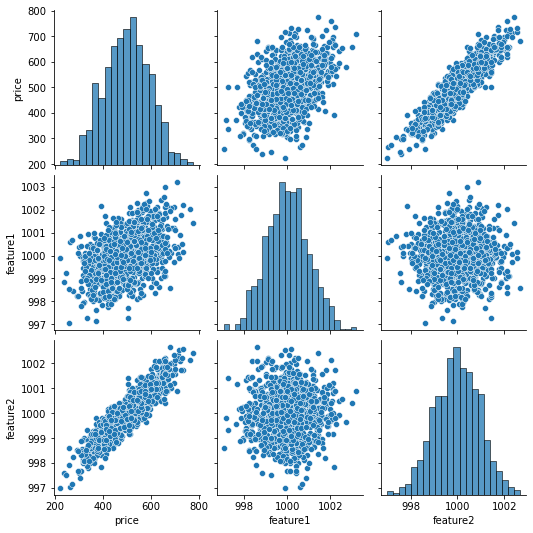

In [3]:
sns.pairplot(df)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_train.max()

1.0

In [46]:
X_test = scaler.fit_transform(X_test)
X_test.min()

0.0

# Keras Syntax

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense

In [47]:
model = Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [48]:
model.fit(x=X_train, y=y_train, epochs=250)
# 1 epoch = one pass over the entire dataset

/step - loss: 247848.6467
Epoch 13/250
22/22 [==============================] - 0s 3ms/step - loss: 249111.2147
Epoch 14/250
22/22 [==============================] - 0s 3ms/step - loss: 249038.1556
Epoch 15/250
22/22 [==============================] - 0s 3ms/step - loss: 251495.3927
Epoch 16/250
22/22 [==============================] - 0s 3ms/step - loss: 245715.5625
Epoch 17/250
22/22 [==============================] - 0s 3ms/step - loss: 247358.8974
Epoch 18/250
22/22 [==============================] - 0s 3ms/step - loss: 243918.9069
Epoch 19/250
22/22 [==============================] - 0s 3ms/step - loss: 242344.5163
Epoch 20/250
22/22 [==============================] - 0s 3ms/step - loss: 238789.4246
Epoch 21/250
22/22 [==============================] - 0s 3ms/step - loss: 238875.3193
Epoch 22/250
22/22 [==============================] - 0s 3ms/step - loss: 242662.6495
Epoch 23/250
22/22 [==============================] - 0s 3ms/step - loss: 235316.6481
Epoch 24/250
22/22 [========

In [49]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

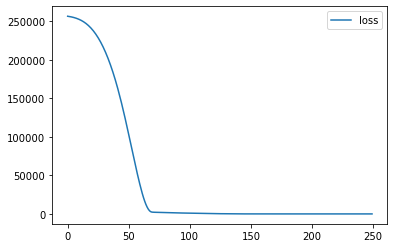

In [51]:
loss_df.plot()

In [55]:
model.evaluate(X_test, y_test, verbose=0)

74.06025695800781

In [57]:
test_predictions = model.predict(X_test)

In [59]:
test_predictions = pd.Series(test_predictions.reshape(300, ))

In [60]:
test_predictions

0      408.180542
1      632.582825
2      601.791199
3      576.395264
4      361.859497
          ...    
295    532.498230
296    510.618896
297    619.046814
298    423.256866
299    411.412903
Length: 300, dtype: float32

In [61]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [62]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [64]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [65]:
pred_df

,Test True Y,Model Predictions
0,402.296319,408.180542
1,624.156198,632.582825
2,582.455066,601.791199
3,578.588606,576.395264
4,371.224104,361.859497
...,...,...
295,525.704657,532.498230
296,502.909473,510.618896
297,612.727910,619.046814
298,417.569725,423.256866


<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

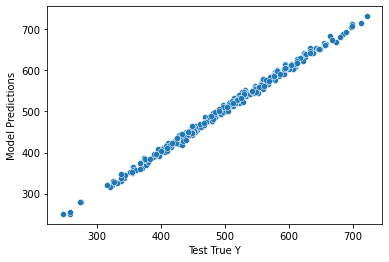

In [66]:
sns.scatterplot(data=pred_df, x='Test True Y', y='Model Predictions')

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

7.0755484356001155

In [72]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

74.06024057512472

In [73]:
new_gem = [[998, 1000]]

In [74]:
new_gem = scaler.transform(new_gem)

In [75]:
model.predict(new_gem)

array([[416.8888]], dtype=float32)

In [76]:
from tensorflow.keras.models import load_model

In [77]:
model.save('my_gem_model.h5')

In [78]:
later_model = load_model('my_gem_model.h5')

In [79]:
later_model.predict(new_gem)

array([[416.8888]], dtype=float32)